In [143]:
from google.colab import drive

In [144]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]

In [146]:
path='/content/drive/MyDrive/USA_Housing.csv'

In [147]:
df=pd.read_csv(path)

In [148]:
df.shape

(5000, 7)

In [149]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


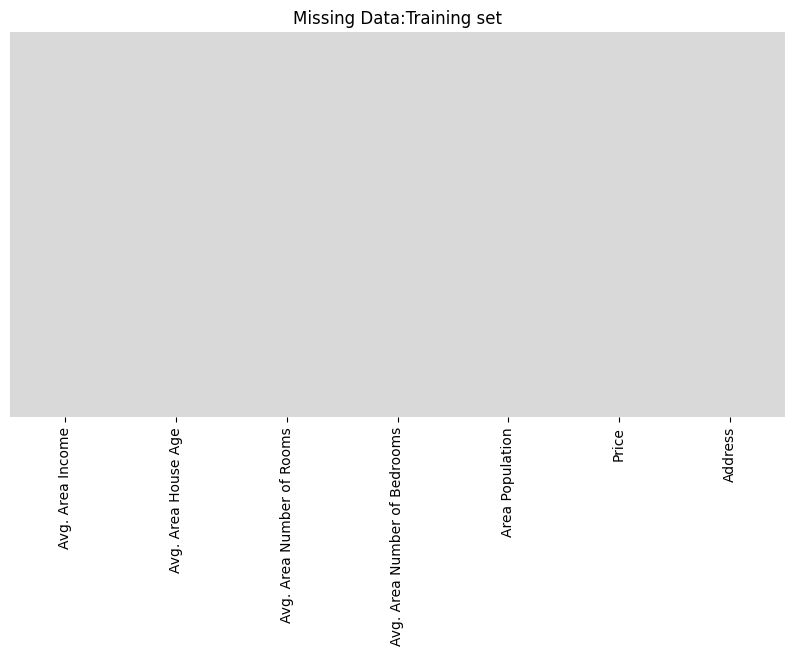

In [151]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title("Missing Data:Training set")
plt.show()

In [152]:
df.drop('Address',axis=1,inplace=True)

In [153]:
df.dropna(inplace=True)

In [154]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [155]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [156]:
df.shape

(5000, 6)

In [157]:
x=df.drop('Price',axis=1)
y=df['Price']

In [158]:
x.shape

(5000, 5)

In [159]:
y.shape

(5000,)

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x_transform=sc.fit_transform(x)

In [161]:
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.2,random_state=101)

In [164]:
X_train.shape

(4000, 5)

In [165]:
X_train

array([[ 0.04369732,  0.64809109, -0.8590542 ,  0.2825495 ,  0.06588164],
       [-0.06720597, -0.58832923,  2.35771467,  1.18205319,  0.70118875],
       [-1.12104293, -0.48373589,  0.1333159 ,  1.71689322,  1.14642906],
       ...,
       [-1.21622414, -2.26082045, -0.11881994, -1.36248876,  2.72262263],
       [-0.51972297, -0.04232647, -1.06821454,  0.09616586, -0.34643377],
       [ 0.60952689,  1.68209486,  1.44465262,  0.2825495 ,  2.01366478]])

In [166]:
y_train.shape

(4000,)

In [167]:
y_train

3413    1.305210e+06
1610    1.400961e+06
3459    1.048640e+06
4293    1.231157e+06
1039    1.391233e+06
            ...     
4171    7.296417e+05
599     1.599479e+06
1361    1.102641e+06
1547    8.650995e+05
4959    2.108376e+06
Name: Price, Length: 4000, dtype: float64

In [168]:
X_test.shape

(1000, 5)

In [169]:
X_test

array([[-0.16966556, -0.26234629,  0.80282069,  0.27444587,  0.06302125],
       [-0.60041423, -1.0606313 ,  0.43738986,  1.81413686, -1.02322996],
       [ 0.47480377,  0.79651541,  1.34160257, -0.51971054,  0.70416773],
       ...,
       [ 0.29979728, -0.05643005,  0.42084024,  0.01512949,  0.14816887],
       [ 1.75369384, -0.95965041,  0.19585073,  1.141535  , -2.88586109],
       [ 0.1583942 , -0.1219486 , -0.20450331, -1.23283058, -0.81230729]])

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
lr=LinearRegression()

In [172]:
lr.fit(X_train,y_train)

LinearRegression()

In [173]:
lr_pred=lr.predict(X_test)

In [174]:
lr_pred

array([1257919.72909701,  822112.41884176, 1740669.05865509,
        972452.12917479,  993422.26329292,  644126.07414431,
       1073911.7910164 ,  856584.00194141, 1445318.25518372,
       1204342.19071214, 1455792.46212894, 1298556.65696451,
       1735924.33836104, 1336925.77577778, 1387637.43231928,
       1222403.77772052,  613786.28691938,  963933.54416253,
       1221197.33050132, 1198071.57563599,  505861.89531635,
       1769106.54723384, 1853881.16842504, 1200369.50507893,
       1065129.12850721, 1812033.73067346, 1768686.47091279,
       1439920.83814321, 1387251.9964939 , 1541178.39224186,
        726418.80504233, 1754497.60908684, 1462185.72653163,
       1025600.16081117, 1284926.86851559,  917454.59590873,
       1187046.94956896,  999330.91117487, 1329536.63409608,
        782191.6044142 , 1393272.03053858,  578216.88394869,
        822643.37151015, 1895533.11413239, 1672019.84892042,
        966926.45434591, 1129674.55638148,  792797.75914644,
       1161057.18412151,

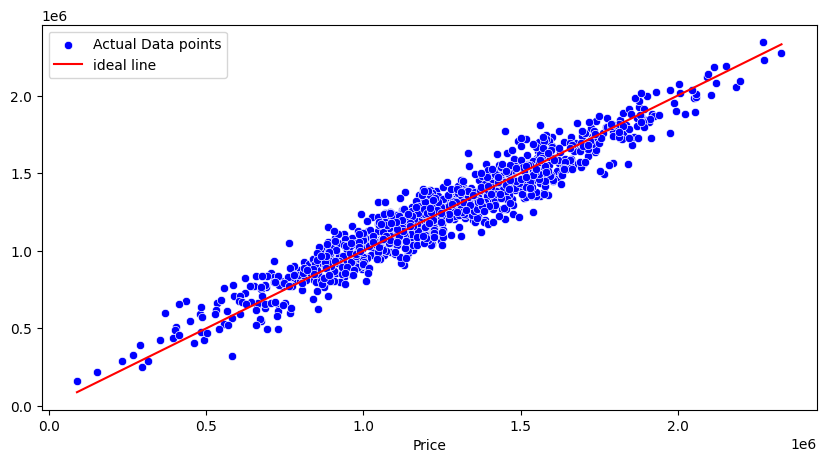

In [175]:
sns.scatterplot(x=y_test,y=lr_pred,color='blue',label='Actual Data points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',label="ideal line")
plt.legend()
plt.show()

In [176]:
results=np.column_stack((y_test,lr_pred))

In [177]:
print("Actual values |  predicted values")

Actual values |  predicted values


In [178]:
for actual,predicted in results:
  print(f"{actual:14.2f} |  {predicted:12.2f}")

    1251688.62 |    1257919.73
     873048.32 |     822112.42
    1696977.66 |    1740669.06
    1063964.29 |     972452.13
     948788.28 |     993422.26
     730043.65 |     644126.07
    1166925.15 |    1073911.79
     705444.12 |     856584.00
    1499988.88 |    1445318.26
    1288199.15 |    1204342.19
    1441736.76 |    1455792.46
    1279681.15 |    1298556.66
    1754969.16 |    1735924.34
    1511653.45 |    1336925.78
    1441956.20 |    1387637.43
    1119992.62 |    1222403.78
     727866.53 |     613786.29
    1138885.10 |     963933.54
    1074263.32 |    1221197.33
    1386473.37 |    1198071.58
     404643.60 |     505861.90
    1449829.49 |    1769106.55
    1775874.76 |    1853881.17
    1202050.58 |    1200369.51
    1105737.46 |    1065129.13
    1835564.69 |    1812033.73
    1795428.77 |    1768686.47
    1424283.37 |    1439920.84
    1365945.08 |    1387252.00
    1492011.50 |    1541178.39
     624432.97 |     726418.81
    1827476.20 |    1754497.61
    1575

In [179]:
residual=actual-lr_pred.reshape(-1)
print(residual)

[-6.97228472e+04  3.66084463e+05 -5.52472177e+05  2.15744753e+05
  1.94774619e+05  5.44070808e+05  1.14285091e+05  3.31612880e+05
 -2.57121373e+05 -1.61453088e+04 -2.67595580e+05 -1.10359775e+05
 -5.47727456e+05 -1.48728894e+05 -1.99440550e+05 -3.42068958e+04
  5.74410595e+05  2.24263338e+05 -3.30004486e+04 -9.87469372e+03
  6.82334987e+05 -5.80909665e+05 -6.65684287e+05 -1.21726232e+04
  1.23067753e+05 -6.23836849e+05 -5.80489589e+05 -2.51723956e+05
 -1.99055115e+05 -3.52981510e+05  4.61778077e+05 -5.66300727e+05
 -2.73988845e+05  1.62596721e+05 -9.67299866e+04  2.70742286e+05
  1.14993234e+03  1.88865971e+05 -1.41339752e+05  4.06005277e+05
 -2.05075149e+05  6.09979998e+05  3.65553510e+05 -7.07336232e+05
 -4.83822967e+05  2.21270428e+05  5.85223255e+04  3.95399123e+05
  2.71396978e+04 -2.84199832e+05 -2.69459822e+05  2.52575477e+04
  8.87432008e+04 -1.69910564e+05  3.47093178e+05  2.01874576e+05
  6.48733519e+04 -6.53417504e+04 -2.40082781e+05  6.89093673e+05
 -2.74620202e+05  7.94525

<Axes: ylabel='Density'>

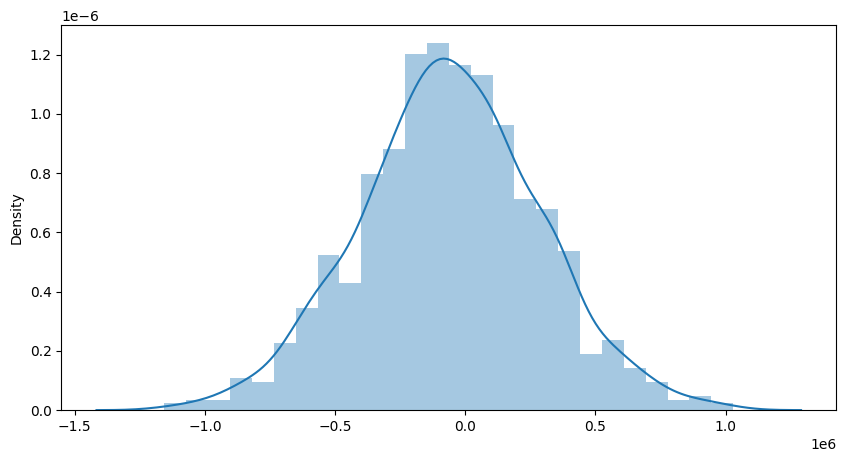

In [180]:
sns.distplot(residual,kde=True)

In [181]:
from sklearn.metrics import mean_squared_error

In [182]:
mse=mean_squared_error(y_test,lr_pred)
rmse=np.sqrt(mse)
print("mean squarred error = ",mse)
print("root mean squarred error = ",rmse)

mean squarred error =  10100187858.867598
root mean squarred error =  100499.69083966178


In [183]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Dr=DecisionTreeRegressor()
Dr.fit(X_train,y_train)


dr_pred=Dr.predict(X_test)


Dtr=mean_squared_error(y_test,dr_pred)

print("Decision tree regressor",Dtr)

Decision tree regressor 31166636246.336555


In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)



y_pred=rf.predict(X_test)


rfr=mean_squared_error(y_test,y_pred)

print("Decision tree regressor",rfr)

Decision tree regressor 15212634231.52293


In [186]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [187]:
gb_pred=gb.predict(X_test)

In [188]:
gbr=mean_squared_error(y_test,gb_pred)
print("GradientBoostingRegressor",gbr)

GradientBoostingRegressor 12399201784.522278


In [189]:
model_score={
    "linearRegression":100499.69083966178,
    "DecisionTree":32235205282.33652,
    "Randomforest":14894841435.28082,
    "GradientBoosting":12389428333.079134
}

In [190]:
sorted_scores=sorted(model_score.items(),key=lambda x:x[1])

In [191]:
print("model ranking (lower values are better)")

model ranking (lower values are better)


In [192]:
for rank,(model_name,score) in enumerate(sorted_scores,start=1):
  print(f"{rank},{model_name}:{score}")

1,linearRegression:100499.69083966178
2,GradientBoosting:12389428333.079134
3,Randomforest:14894841435.28082
4,DecisionTree:32235205282.33652
